In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set_style('white')

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Funtion to calculate the hallo mass function at a fixed stellar mass

ZM15.pdf eq 19

In [2]:
def Mh(M_s,M_1,M_s0, beta, gamma, delta):
    m = M_s / M_s0
    
    val = M_1 * (m**beta) * 10**(((m**delta) / (1. + m**(-gamma))) - 0.5)
    
    return np.log10(val)

In [3]:
ms = np.linspace(9.5,12.,1000)

In [4]:
m_h = Mh( 10**ms, 0.7*(10**12.09899), 10**10.30790, 0.33272,1.20579,0.440)

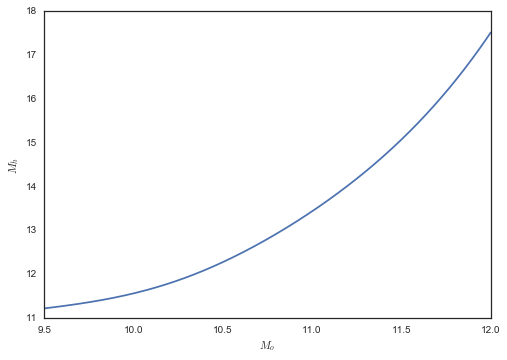

In [5]:
plt.plot(ms,m_h);
plt.xlabel(r'$M_o$')
plt.ylabel(r'$M_h$')

read_mock is a scrpt from ying that lets us read the bolshoi dataset

In [6]:
from read_mock import test_mock_shmr

Cosmology/HMF code is required.
SHMR code is required.


In [7]:
mock = '/Users/Oleg/Documents/macss2017_quenching/data/iHODcatalog_bolshoi.h5'

galaxy
[('conc', 'float64'), ('g-r', 'float64'), ('halo_id', 'int64'), ('lg_halo_mass', 'float64'), ('lg_stellar_mass', 'float64'), ('x', 'float64'), ('y', 'float64'), ('z', 'float64'), ('z_rs', 'float64')]
The data columns are: 
('conc', 'g-r', 'halo_id', 'lg_halo_mass', 'lg_stellar_mass', 'x', 'y', 'z', 'z_rs')


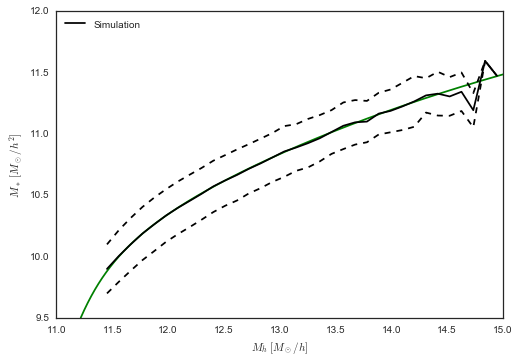

In [8]:
plt.figure();
plt.plot(m_h,ms,'g')
#plt.plot(m_h,m_s(m_h),'r');
plt.xlim(11,15)
plt.ylim(9.5,12)
test_mock_shmr(mock);

In [9]:
from read_mock import read_mock

In [10]:
r = read_mock(mock)

galaxy
[('conc', 'float64'), ('g-r', 'float64'), ('halo_id', 'int64'), ('lg_halo_mass', 'float64'), ('lg_stellar_mass', 'float64'), ('x', 'float64'), ('y', 'float64'), ('z', 'float64'), ('z_rs', 'float64')]
The data columns are: 
('conc', 'g-r', 'halo_id', 'lg_halo_mass', 'lg_stellar_mass', 'x', 'y', 'z', 'z_rs')


In [11]:
s_mass = r['lg_stellar_mass'][:]
h_mass = r['lg_halo_mass'][:]

this is a mask to get rid of the satelite halos

In [12]:
low_mass = h_mass > 0.0

In [13]:
mask_Mh = h_mass[low_mass]
mask_Ms = s_mass[low_mass]

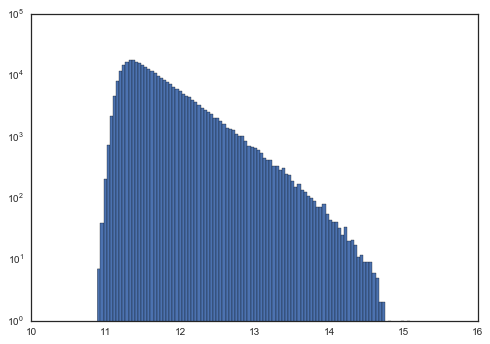

In [14]:
plt.hist(mask_Mh,bins=100);
plt.yscale('log')

next we made a function to calcule numerically the mean halo mass at a fixed stellar mass $<M_h|M_s>$

In [15]:
def mean_Mh(nbins,halo_m, stellar_m):
    bins = np.linspace(9,12,nbins)
    
    mean_mh = np.zeros(nbins)
    mean_ms = np.zeros(nbins)
    sigma = np.zeros(nbins)
    
    for i in xrange(nbins-1):
        bin_min = bins[i]
        bin_max = bins[i+1]
        
        bin_mask = (stellar_m >= bin_min) & (stellar_m < bin_max)
        nsel = np.sum(bin_mask)
        
        if nsel > 0.0:
            mean_mh[i] = np.mean(halo_m[bin_mask])
            mean_ms[i] = np.mean(stellar_m[bin_mask])
            sigma[i] = np.std(halo_m[bin_mask]) / np.sqrt(nsel)
        else:
            mean_mh[i] = 0.0
            mean_ms[i] = 0.0
            
    return mean_ms, mean_mh, sigma
        

In [16]:
mean_s, mean_h,error = mean_Mh(30, mask_Mh, mask_Ms)

(6, 16)

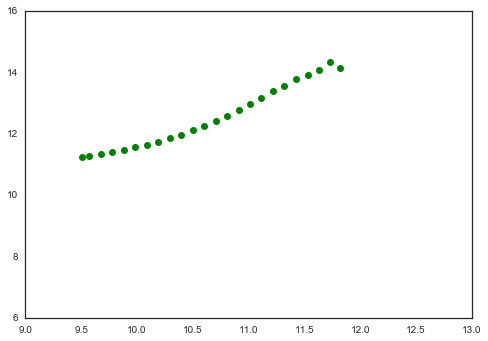

In [17]:
plt.errorbar(mean_s,mean_h,fmt='o',color='g');
plt.xlim(9,13)
plt.ylim(6,16)

In [18]:
print error

[ 0.          0.          0.          0.          0.00156425  0.00069825
  0.00078195  0.00087256  0.00099336  0.00113277  0.00130127  0.0015345
  0.00179972  0.0021559   0.00257066  0.00324544  0.00401334  0.00517145
  0.00687623  0.00913311  0.01272892  0.01703696  0.02365463  0.03861393
  0.06285557  0.13162952  0.0627102   0.          0.          0.        ]


The prob2b gets the 2-d probability $P(lnMs,lnMh)$ 

$<lnM_h|lnM_s> = \int P(lnM_h|lnM_s)P(lnM_h)d(lnM_h)$

$P(lnM_h) = \frac{P(lnMs,lnMh)}{P(lnMs)}$

$P(lnMs) = \int P(lnMs,lnMh)d(lnMh)$

In [19]:
from prob2d import get_prob2d

In [20]:
p2d, lnMs, lnMh = get_prob2d()

In [21]:
print p2d[:10]

[[  1.97690300e+01   1.86025038e+01   1.74962406e+01 ...,   4.81837587e-44
    2.12228165e-44   9.17140041e-45]
 [  1.60409046e+00   1.59305926e+00   1.58132925e+00 ...,   3.21480859e-43
    1.42159912e-43   6.16767349e-44]
 [  1.27094635e-01   1.33213219e-01   1.39557997e-01 ...,   2.09442314e-42
    9.29835526e-43   4.05006466e-43]
 ..., 
 [  2.77614381e-07   3.81019522e-07   5.22684706e-07 ...,   1.71962561e-38
    7.78706903e-39   3.45929666e-39]
 [  1.90664350e-08   2.76179727e-08   3.99853952e-08 ...,   9.71118857e-38
    4.41501507e-38   1.96905373e-38]
 [  1.27865063e-09   1.95475003e-09   2.98688056e-09 ...,   5.35507717e-37
    2.44424772e-37   1.09441538e-37]]


A function to calculate all the integrals and get the mean of halo mass

In [22]:
def exp_Mh(prob2, probh, probm):
    int1 = np.trapz(prob2, x = probm, axis=0)
    norm = np.trapz(int1, x=probh)
    #print np.abs(norm - 1.0) > 1e-5
    
    p_ms = np.trapz(prob2, probh, axis=-1)
    print np.trapz(p_ms,probm)
    
    joint_p = []
    for i in range(len(probm)):
        joint_p.append(prob2[i,:] / p_ms[i])
    
    joint_p = np.array(joint_p)
     
    exp = []
    for k in range(len(probm)):
        exp.append(np.trapz(joint_p[k,:]*probh, probh))
            
        
    return np.array(exp)    

In [23]:
exp_halo = exp_Mh(p2d, lnMh, lnMs)

1.0


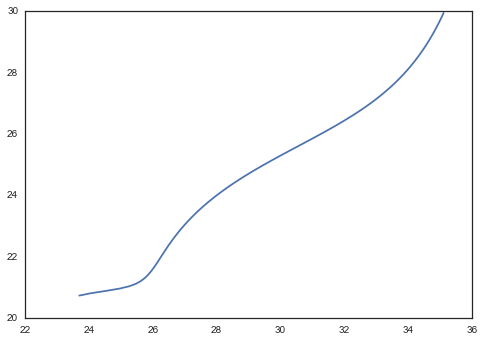

In [24]:
plt.plot(exp_halo, lnMs);

In [25]:
lgmh = exp_halo/np.log(10.) + np.log10(0.7)
lgms = lnMs/np.log(10.)

(6, 16)

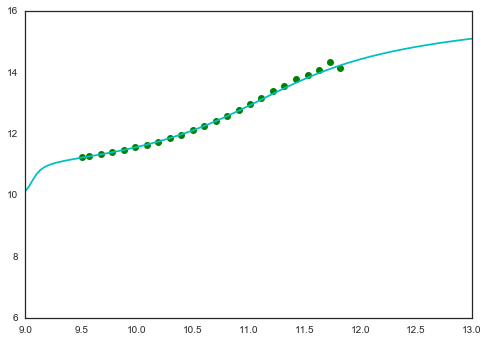

In [26]:
plt.errorbar(mean_s,mean_h,fmt='o',color='g');
plt.plot(lgms,lgmh,'c')
plt.xlim(9,13)
plt.ylim(6,16)

ying's results

In [27]:
from halomass import *

galaxy
[('conc', 'float64'), ('g-r', 'float64'), ('halo_id', 'int64'), ('lg_halo_mass', 'float64'), ('lg_stellar_mass', 'float64'), ('x', 'float64'), ('y', 'float64'), ('z', 'float64'), ('z_rs', 'float64')]
The data columns are: 
('conc', 'g-r', 'halo_id', 'lg_halo_mass', 'lg_stellar_mass', 'x', 'y', 'z', 'z_rs')


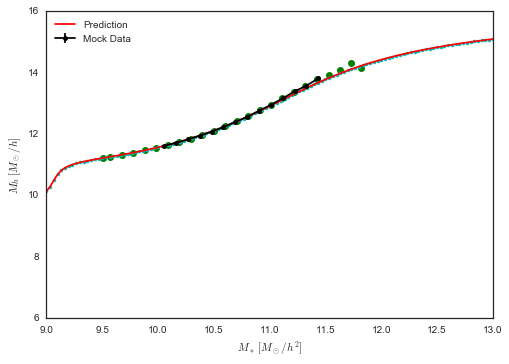

In [28]:
plt.errorbar(mean_s,mean_h,fmt='o',color='g');
plt.plot(lgms,lgmh,'.c')
plt.xlim(9,13)
plt.ylim(6,16)
compare_halomass_with_mock(mock)

In [29]:
gcolor = r['g-r'][:]

In [30]:
color_mask = gcolor[low_mass]

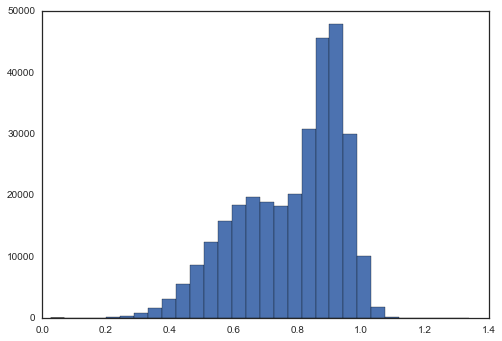

In [31]:
plt.hist(color_mask,bins=30);

Function to make the red and blud cut

In [32]:
def isred1(log_smass, gcolor1):
    cut = 0.8*(log_smass/10.5)**0.6
    isred2 = gcolor1 >= cut
    return(isred2)

In [33]:
def exp_Mh_split(nbins,halo_m, stellar_m):
    bins = np.linspace(10, 11.5, nbins)
    
    mean_mh_r = np.zeros(nbins)
    mean_ms_r = np.zeros(nbins)
    sigma_r = np.zeros(nbins)
    
    mean_mh_b = np.zeros(nbins)
    mean_ms_b = np.zeros(nbins)
    sigma_b = np.zeros(nbins)
    
    for i in xrange(nbins-1):
        bin_min = bins[i]
        bin_max = bins[i+1]
        
        bin_mask = (stellar_m >= bin_min) & (stellar_m < bin_max)
        nsel = np.sum(bin_mask)
        
        red_mask = isred1(stellar_m[bin_mask] , color_mask[bin_mask])
        nred = float(np.sum(red_mask))
        
        blue_mask = ~red_mask
        nblue = float(np.sum(blue_mask))
        
        if nsel > 5.0:
            
            mean_mh_r[i] = np.mean(halo_m[bin_mask][red_mask])
            mean_ms_r[i] = np.log10(np.mean(10**stellar_m[bin_mask][red_mask]))
            sigma_r[i] = np.std(halo_m[bin_mask][red_mask])/np.sqrt(nred)
            
            mean_mh_b[i] = np.mean(halo_m[bin_mask][blue_mask])
            mean_ms_b[i] = np.log10(np.mean(10**stellar_m[bin_mask][blue_mask]))
            sigma_b[i] = np.std(halo_m[bin_mask][blue_mask])/np.sqrt(nblue)
        
        else:
            mean_mh_r[i] = 0.0
            mean_ms_r[i] = 0.0
            
            mean_mh_b[i] = 0.0
            mean_ms_b[i] = 0.0
            
    return mean_mh_r, mean_ms_r, sigma_r, mean_mh_b, mean_ms_b, sigma_b
        
        

In [34]:
h_r,s_r,e_r,h_b,s_b,e_b = exp_Mh_split(10, mask_Mh, mask_Ms)

In [35]:
print h_r

[ 11.67123193  11.84154148  12.03671109  12.26470693  12.52072738
  12.79251507  13.09567937  13.41980956  13.74780778   0.        ]


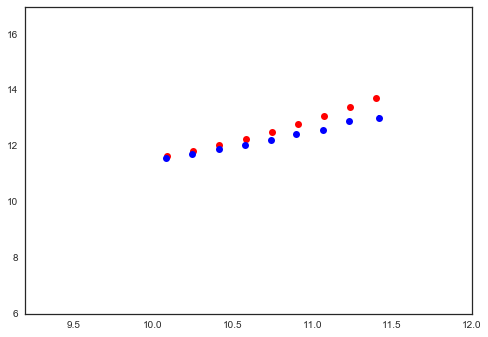

In [36]:
plt.errorbar(s_r,h_r,yerr=e_r,fmt='o',color='r');
plt.errorbar(s_b,h_b,yerr=e_b,fmt='o',color='b');
plt.xlim(9.2,12)
plt.ylim(6,17);

now we get the 2d probability for blue and red galaxies

In [37]:
from prob2d_mine import get_prob2d1

In [38]:
def exp_Mh_split(theta, use_red):
    
    prob2_sp, probm_sp, probh_sp = get_prob2d1(theta, use_red)
    
    int_sp = np.trapz(prob2_sp, x = probm_sp, axis=0)
    norm_sp = np.trapz(int_sp, x=probh_sp)
    print np.abs(norm_sp - 1.0) > 1e-5
    
    p_ms_sp = np.trapz(prob2_sp, probh_sp, axis=-1)
    print np.trapz(p_ms_sp,probm_sp)
    
    joint_sp = []
    for i in range(len(probm_sp)):
        joint_sp.append(prob2_sp[i,:] / p_ms_sp[i])

    
    joint_sp = np.array(joint_sp)
    
    for j in range(len(probm_sp)):
        norm2s = np.trapz(joint_sp[j,:],probh_sp)
        if np.abs(norm2s - 1.) > 1e-5:
            print 'error'
    
    exp_sp = []
    for k in range(len(probm_sp)):
        exp_sp.append(np.trapz(joint_sp[k,:]*probh_sp, probh_sp))
    exp_sp = np.array(exp_sp)
    lgexp = (exp_sp/np.log(10.)) + np.log10(0.7)
    lgprobm = probm_sp / np.log(10.)
        
    return lgprobm, lgexp  

p2d_r, lnMs_r, lnMh_r = get_prob2d1((12.0,0.8), colors='red')
p2d_b, lnMs_b, lnMh_b = get_prob2d1((12.0,0.8), colors='blue')
p2d_b1, lnMs_b1, lnMh_b1 = get_prob2d1((12.0,0.4), colors='blue')

exp_halo_r = exp_Mh(p2d_r, lnMh_r, lnMs_r)
exp_halo_b = exp_Mh(p2d_b, lnMh_b, lnMs_b)
exp_halo_b1 = exp_Mh(p2d_b1, lnMh_b1, lnMs_b1)

lgmh_r = (exp_halo_r/np.log(10.)) + np.log10(0.7)
lgms_r = lnMs_r/np.log(10.)

lgmh_b = (exp_halo_b/np.log(10.)) + np.log10(0.7)
lgms_b = lnMs_b/np.log(10.)

lgmh_b1 = (exp_halo_b1/np.log(10.)) + np.log10(0.7)
lgms_b1 = lnMs_b1/np.log(10.)

#plt.plot(lgms_r, lgmh_r,'r');
plt.plot(lgms_r, lgms_b,'b');
plt.plot(lgms_r, lgms_b1,'c');
#plt.errorbar(s_r,h_r,yerr=e_r,fmt='o',color='r');
plt.errorbar(s_b,h_b,yerr=e_b,fmt='o',color='b');

print p2d_b[1,:10]
print p2d_r[1,:10]

In [45]:
def comp_splot(theta, use_red, mockfile):
    galrec = read_mock(mockfile)
    iscen = galrec['lg_halo_mass'] > 1
    lgmh1 = galrec['lg_halo_mass'][iscen]
    lgms1 = galrec['lg_stellar_mass'][iscen]
    gcolor1 = galrec['g-r'][iscen]
    isred_m = isred1(lgms1, gcolor1)
    # check which of them are red vs blue
    if use_red:
        colsel = isred_m
        xlabel = r"$M_*^{\mathrm{red}}\;[M_\odot/h^2]$"
        color = 'r'
        label = 'Mock Red Data'
        _label = 'Predicted Red'
    else:
        colsel = ~isred_m
        xlabel = r"$M_*^{\mathrm{blue}}\;[M_\odot/h^2]$"
        color = 'b'
        label = 'Mock Blue Data'
        _label = 'Predicted Blue'
    # prediction!
    #model
    lgMs_arr, lgMh_mean_arr = exp_Mh_split(theta, use_red)
    #plt.plot(lgMs_arr, lgMh_mean_arr, color=color, label=_label)
    # select red or blue centrals
    lgmh1 = lgmh1[colsel]
    lgms1 = lgms1[colsel]
    # do measurements in the same way
    lgms_bins = np.linspace(10.0, 11.5, 10)
    lgms_cens = (lgms_bins[1:] + lgms_bins[:-1]) * 0.5
    lgmh_cens = np.zeros_like(lgms_cens)
    lgmh_errs = np.zeros_like(lgms_cens)
    for i in xrange(lgms_cens.size):
        sel = (lgms1 >= lgms_bins[i]) & (lgms1 < lgms_bins[i+1])
        nsel = np.sum(sel)
        if nsel > 5:
            # update lgms_cens
            lgms_cens[i] = np.mean(lgms1[sel])
            lgmh_cens[i] = np.mean(lgmh1[sel])
            lgmh_errs[i] = np.std(lgmh1[sel]) / np.sqrt(float(nsel))
    return lgMs_arr, lgMh_mean_arr, lgms_cens, lgmh_cens, lgmh_errs

In [40]:
ms_pre_r, mh_pre_r, ms_meas_r, mh_meas_r, err_meas_r = comp_splot((12.,0.3), use_red=True, mockfile=mock)

galaxy
[('conc', 'float64'), ('g-r', 'float64'), ('halo_id', 'int64'), ('lg_halo_mass', 'float64'), ('lg_stellar_mass', 'float64'), ('x', 'float64'), ('y', 'float64'), ('z', 'float64'), ('z_rs', 'float64')]
The data columns are: 
('conc', 'g-r', 'halo_id', 'lg_halo_mass', 'lg_stellar_mass', 'x', 'y', 'z', 'z_rs')
False
1.0


In [41]:
ms_pre_b, mh_pre_b, ms_meas_b, mh_meas_b, err_meas_b = comp_splot((12.,0.3), use_red=False, mockfile=mock)

galaxy
[('conc', 'float64'), ('g-r', 'float64'), ('halo_id', 'int64'), ('lg_halo_mass', 'float64'), ('lg_stellar_mass', 'float64'), ('x', 'float64'), ('y', 'float64'), ('z', 'float64'), ('z_rs', 'float64')]
The data columns are: 
('conc', 'g-r', 'halo_id', 'lg_halo_mass', 'lg_stellar_mass', 'x', 'y', 'z', 'z_rs')
False
1.0


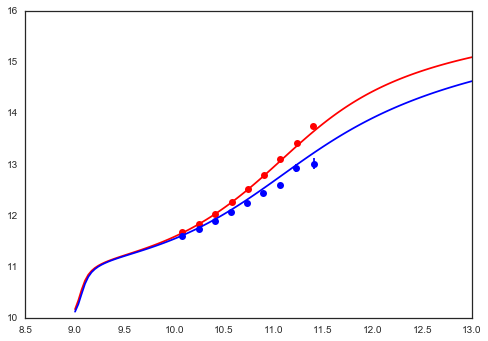

In [42]:
plt.figure()
plt.plot(ms_pre_r, mh_pre_r,'r');
plt.errorbar(ms_meas_r, mh_meas_r,yerr=err_meas_r,fmt='o',color='r');
plt.plot(ms_pre_b, mh_pre_b,'b');
plt.errorbar(ms_meas_b, mh_meas_b, yerr=err_meas_b,fmt='o',color='b');


In [44]:
print err_meas_b
print err_meas_r

[ 0.0014386   0.0019644   0.00278896  0.00420903  0.00685393  0.01336123
  0.02998387  0.07433922  0.10535256]
[ 0.00143094  0.00173198  0.00216131  0.00283672  0.00385172  0.00568299
  0.0088931   0.01462466  0.02720266]


In [43]:
import emcee

In [ ]:
def lnlike()